## EDA on Cell Tracking Dataset

The dataset is sourced from the [cell tracking challenge](http://celltrackingchallenge.net/) website.

## Download and Extract Data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://data.celltrackingchallenge.net/training-datasets/Fluo-N3DH-CE.zip -P /content/drive/MyDrive/GSoC/dataset
!rsync -a /content/drive/MyDrive/GSoC/dataset/celltrackingchallenge/  /content/

In [ ]:
# !cp -r /content/drive/MyDrive/GSoC/dataset/celltrackingchallenge/features /content/features
# !cp -r /content/drive/MyDrive/GSoC/dataset/celltrackingchallenge/segmentation_maps /content/segmentation_maps
!cp -r /content/drive/MyDrive/GSoC/dataset/celltrackingchallenge/Fluo-N3DH-CE .

^C


In [ ]:
!unzip /content/Fluo-N3DH-CE.zip
#!unzip /content/drive/MyDrive/GSoC/dataset/Fluo-N3DH-CE.zip


unzip:  cannot find or open /content/Fluo-N3DH-CE.zip, /content/Fluo-N3DH-CE.zip.zip or /content/Fluo-N3DH-CE.zip.ZIP.


In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [4]:
import pandas as pd
import torch
import tifffile as tiff
from skimage import io,img_as_float
from torchvision.transforms import ToTensor

We First Load the image from tiff format

In [5]:
def load_img_from_tiff(path2img):
    img_tensor = torch.tensor(tiff.imread(path2img))
    return(img_tensor)

In [6]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01/t100.tif")

FileNotFoundError: ignored

## Define `display_images`


In [ ]:
def display_images(images, columns=5, width=20, height=3, max_images=40, label_wrap_length=4, label_font_size=8):

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images] # always show 40 images or less

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))

    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image, cmap='inferno')

In [ ]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01/t023.tif")
print(arr_images.shape)

(35, 512, 708)


## Plot images:
The grid below contains images from one `.tif` file. Every 2D image represents a slice of the raw 3D data.

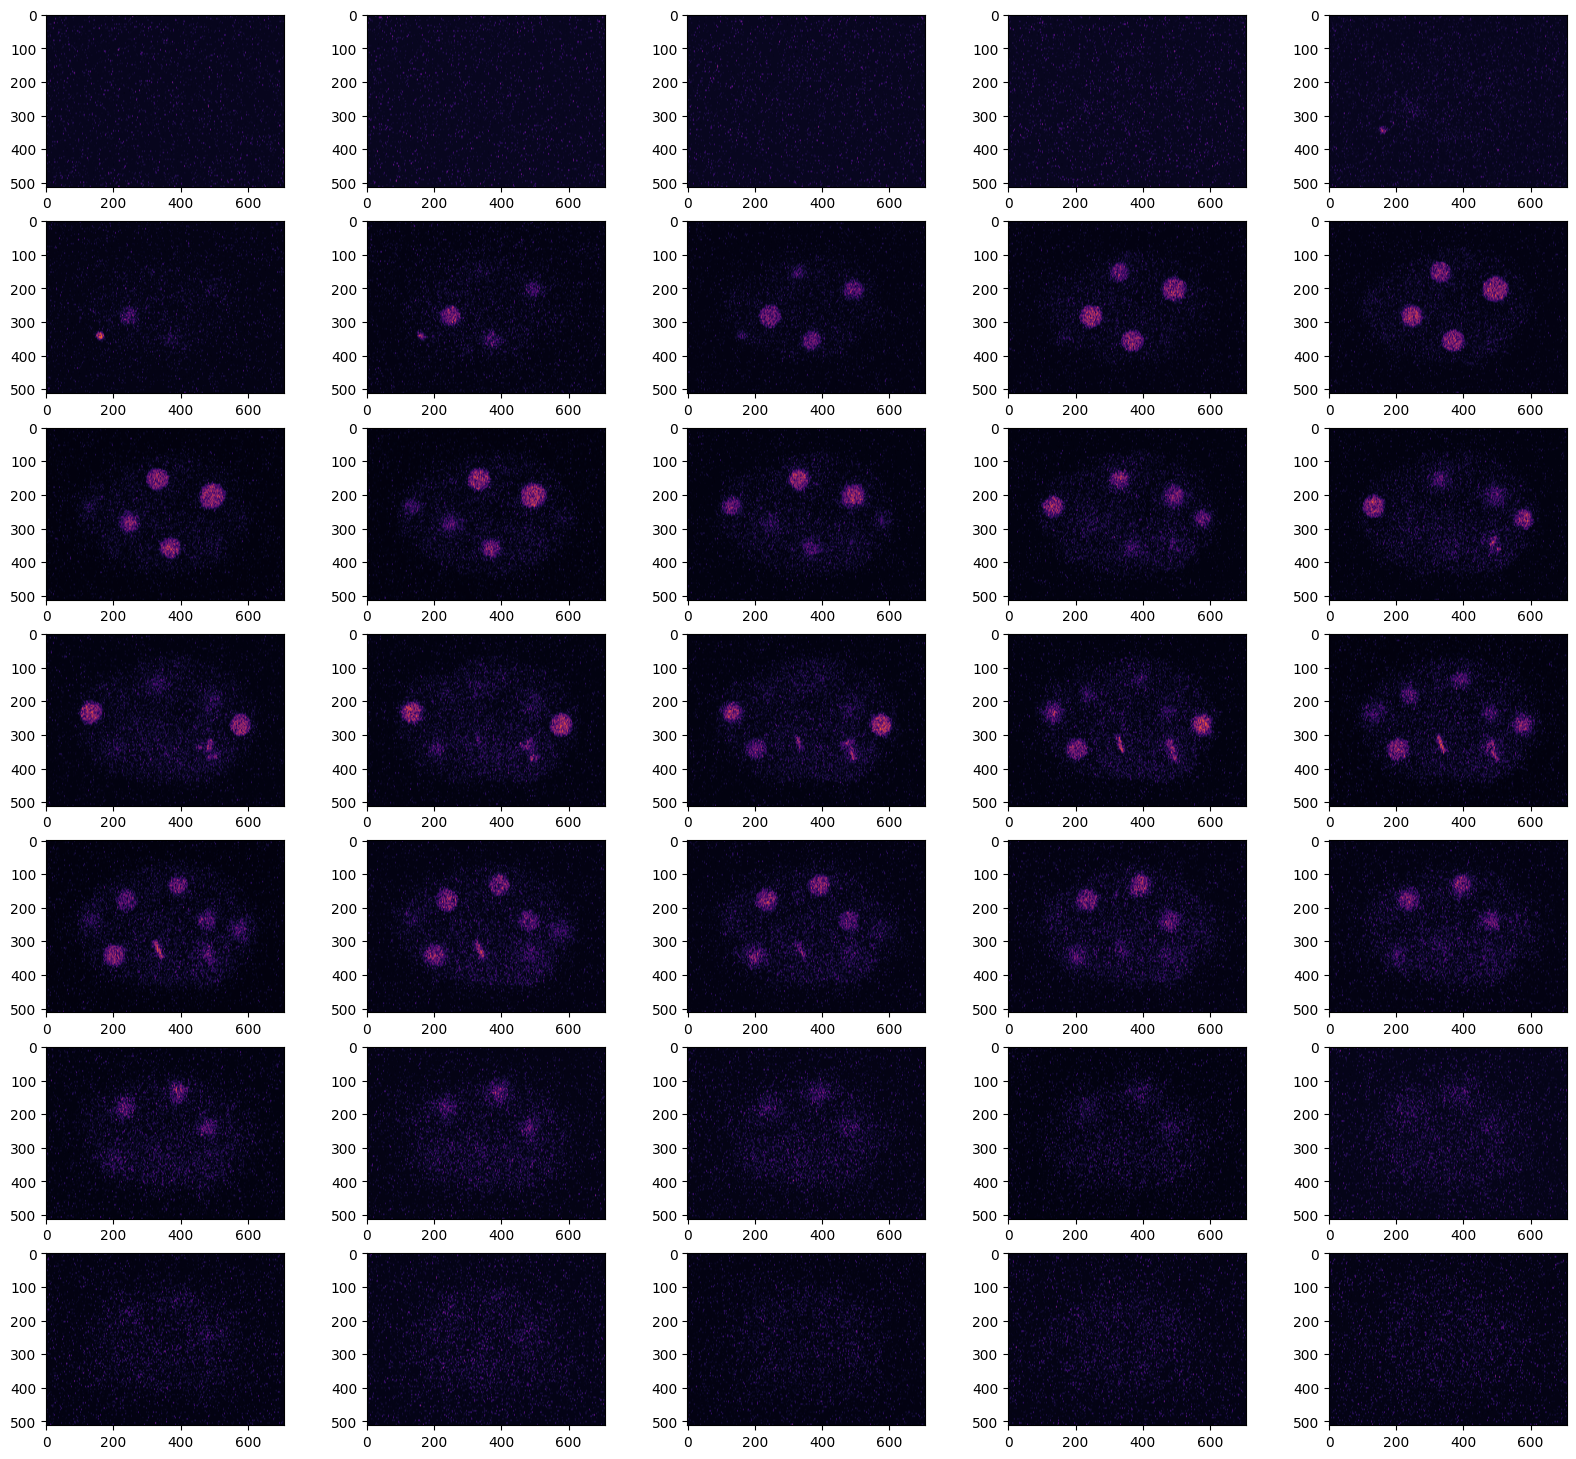

In [ ]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01/t023.tif")
display_images(arr_images)

## Plot Corresponding Segmentation Maps:
The grid below contains segmentation maps which correspond to the images above. These are stored in a seperate `.tif` file

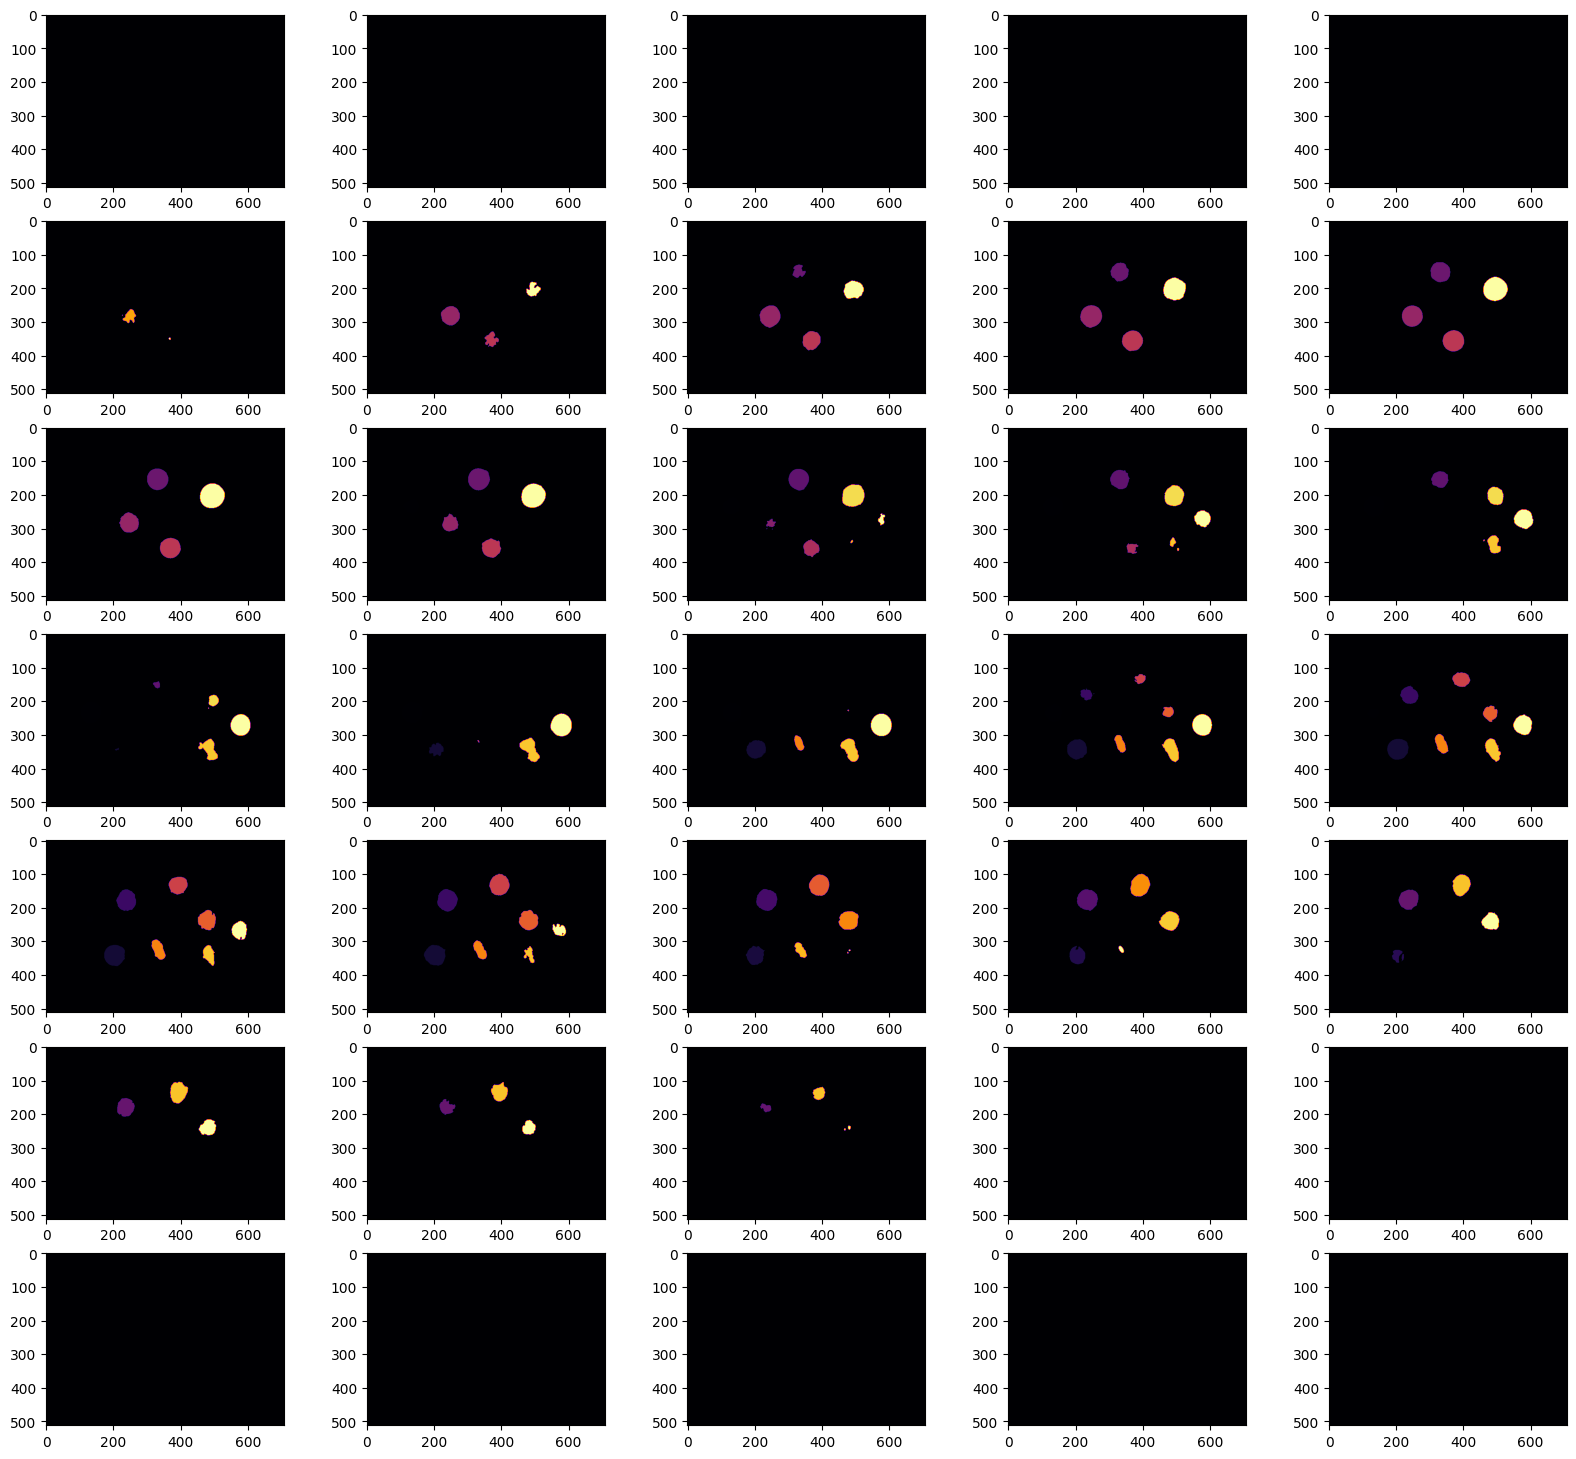

In [ ]:
arr_images = load_img_from_tiff("/content/Fluo-N3DH-CE/01_ST/SEG/man_seg023.tif")
display_images(arr_images)

## Convert `.tif` files into `.jpeg` and `.png`



In [ ]:
!mkdir features
!mkdir segmentation_maps
!mkdir features_jpeg
!mkdir segmentation_maps_jpeg

In [ ]:
from tqdm import tqdm

for t in tqdm(range(194)):
  t3 = f"{t:03}"
  feature_path="/content/Fluo-N3DH-CE/01/t"+str(t3)+".tif"
  seg_map_path="/content/Fluo-N3DH-CE/01_ST/SEG/man_seg"+str(t3)+".tif"
  features_arr = load_img_from_tiff(feature_path)
  seg_arr = load_img_from_tiff(seg_map_path)

  for i in range(len(features_arr)):
    cv2.imwrite('/content/features_jpeg/F'+str(t)+'_'+str(i)+'.jpeg', features_arr[i])
    cv2.imwrite('/content/segmentation_maps_jpeg/L'+str(t)+'_'+str(i)+'.jpeg', seg_arr[i])
    cv2.imwrite('/content/features/F'+str(t)+'_'+str(i)+'.png', features_arr[i])
    cv2.imwrite('/content/segmentation_maps/L'+str(t)+'_'+str(i)+'.png', seg_arr[i])

100%|██████████| 194/194 [02:13<00:00,  1.46it/s]


In [ ]:
features_path, label_path = "/content/features/", "/content/segmentation_maps/"
features_path_jpeg, label_path_jpeg = "/content/features_jpeg/", "/content/segmentation_maps_jpeg/"

## Resize images:

In [ ]:
from PIL import Image
from os import listdir
from os.path import splitext

source_directory = '/content/segmentation_maps_jpeg/'
target_directory = '/content/segmentation_maps/'

target = '.png'

for file in listdir(source_directory):
    filename, extension = splitext(file)
    try:
        if extension not in ['.py', target]:
            im = Image.open(source_directory + filename + extension)
            im.save(target_directory + filename + target)
    except OSError:
        print('Cannot convert %s' % file)

In [ ]:
from PIL import Image
import os, sys

def resize(path):
  dirs = os.listdir( path )
  for item in tqdm(dirs):
    if os.path.isfile(path+item):
      im = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      imResize = im.resize((256,256), Image.NEAREST)
      imResize.save(f+e, 'PNG', quality=100)

features_path, label_path = "/kaggle/input/cell-tracking-challenge/content/features/", "/kaggle/input/cell-tracking-challenge/content/segmentation_maps/"
resize(label_path)
resize(features_path)

100%|██████████| 6790/6790 [01:09<00:00, 97.17it/s]


Finally copy the result to your drive!

In [ ]:
!cp -r /content/features/ /content/drive/MyDrive/GSoC/dataset/features
!cp -r /content/segmentation_maps/ /content/drive/MyDrive/GSoC/dataset/segmentation_maps

In [ ]:
!cp -r /content/drive/MyDrive/GSoC/dataset/nucleus_seg_data.zip .

In [ ]:
!unzip nucleus_seg_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: segmentation_maps/L144_13.png  
  inflating: segmentation_maps/L144_14.png  
  inflating: segmentation_maps/L144_15.png  
  inflating: segmentation_maps/L144_16.png  
  inflating: segmentation_maps/L144_17.png  
  inflating: segmentation_maps/L144_18.png  
  inflating: segmentation_maps/L144_19.png  
  inflating: segmentation_maps/L144_2.png  
  inflating: segmentation_maps/L144_20.png  
  inflating: segmentation_maps/L144_21.png  
  inflating: segmentation_maps/L144_22.png  
  inflating: segmentation_maps/L144_23.png  
  inflating: segmentation_maps/L144_24.png  
  inflating: segmentation_maps/L144_25.png  
  inflating: segmentation_maps/L144_26.png  
  inflating: segmentation_maps/L144_27.png  
  inflating: segmentation_maps/L144_28.png  
  inflating: segmentation_maps/L144_29.png  
  inflating: segmentation_maps/L144_3.png  
  inflating: segmentation_maps/L144_30.png  
  inflating: segmentation_maps/L144_31.png  
  infl

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import csv

ids=[]
features_path = "/content/features"
label_path = "/content/segmentation_maps"
label_filenames = [f for f in listdir(label_path) if isfile(join(label_path, f))]
feature_filenames = [f for f in listdir(features_path) if isfile(join(features_path, f))]
for i in range(len(label_filenames)):
  ids.append(label_filenames[i][1:])
print(len(ids))

df = pd.DataFrame(ids ,columns=["file_ids"])
df.to_csv('file_ids.csv', index=False)

#sanity check
# df = pd.read_csv('file_ids_.csv')

6790


In [ ]:
!cp -r /content/file_ids.csv /content/drive/MyDrive/GSoC/dataset/

In [ ]:
import cv2
import numpy as np

def find_instance_bounding_boxes(image, masks):
    # Convert masks to binary format
    binary_masks = (masks > 0.5).astype(np.uint8)

    # Initialize a list to store bounding box coordinates and labels
    bounding_boxes = []

    # Iterate over each mask
    for mask in binary_masks:
        # Find connected components in the mask
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

        # Iterate over each connected component (excluding the background)
        for label in range(1, num_labels):
            # Get the bounding box coordinates
            x, y, width, height, _ = stats[label]

            # Calculate the coordinates of the bounding box
            xmin, ymin, xmax, ymax = x, y, x + width, y + height

            # Append bounding box coordinates and label to the list
            bounding_boxes.append((xmin, ymin, xmax, ymax, label))

    return bounding_boxes

# Example usage
image = cv2.imread('/content/features/F0_18.png', cv2.IMREAD_COLOR)
masks = cv2.imread('/content/segmentation_maps/L0_18.png')

bounding_boxes = find_instance_bounding_boxes(image, masks)

# Print the bounding box coordinates and labels
for box in bounding_boxes:
    xmin, ymin, xmax, ymax, label = box
    print(f'Label: {label}, Bounding Box: ({xmin}, {ymin}, {xmax}, {ymax})')


Label: 1, Bounding Box: (0, 133, 3, 134)
Label: 2, Bounding Box: (0, 136, 3, 138)
Label: 3, Bounding Box: (0, 139, 3, 141)
Label: 4, Bounding Box: (0, 143, 3, 144)
Label: 1, Bounding Box: (0, 134, 3, 135)
Label: 2, Bounding Box: (0, 137, 3, 144)
Label: 3, Bounding Box: (0, 147, 3, 148)
Label: 1, Bounding Box: (0, 134, 3, 145)
Label: 2, Bounding Box: (0, 146, 3, 148)
Label: 1, Bounding Box: (0, 133, 3, 148)
Label: 1, Bounding Box: (0, 128, 3, 130)
Label: 2, Bounding Box: (0, 131, 3, 149)
Label: 1, Bounding Box: (0, 127, 3, 128)
Label: 2, Bounding Box: (0, 132, 3, 148)
Label: 3, Bounding Box: (0, 149, 3, 150)
Label: 1, Bounding Box: (0, 131, 3, 149)
Label: 1, Bounding Box: (0, 127, 3, 149)
Label: 1, Bounding Box: (0, 129, 3, 151)
Label: 1, Bounding Box: (0, 125, 3, 126)
Label: 2, Bounding Box: (0, 128, 3, 151)
Label: 1, Bounding Box: (0, 124, 3, 127)
Label: 2, Bounding Box: (0, 128, 3, 151)
Label: 1, Bounding Box: (0, 126, 3, 153)
Label: 1, Bounding Box: (0, 126, 3, 152)
Label: 2, Boundi